## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/ds4e/knn`

**Q0.**
1. What is the difference between regression and classification?

Classification relies on features to label data. Regression is a way to predict continuous data.

2. What is a confusion table? What does it help us understand about a model's performance?

A confusion table is a table that shows true negatives/positives and false negatives/positives of a classification model's performance. It helps us understand trends in the inaccuracies.

3. What does the SSE quantify about a particular model?

The Sum of Squared Errors quanitfies the permormance of a regression model. (A lower SSE -> A better fit model)

4. What are overfitting and underfitting?

Overfitting is when the model is too close to the training data so it doesn't perform well on the testing data. Underfitting is when the model is not close enough to the training data so it's too general on the testing data and likely misses underlying trends.

5. Why does splitting the data into training and testing sets, and choosing $k$ by evaluating accuracy or SSE on the test set, improve model performance?

Splitting of testing sets from the training data helps improve the model because it allows us to test the model on unseen data. Then, we can adjust the parameters based on the accuracy/SSE of the test set because we are improving the models fit on unseen data instead of the training data which could result in overfitting.

6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

Class labels are straightforward and easy to interpret. Probability distributions over class labels are more specific and certain cases require more nuance than just one class label prediction. However, the distributions can be more difficult to interpret especially for someone assesing the model who doesn't work with data frequently.


**Q1.** This question is a case study for $k$ nearest neighbor regression, using the `USA_cars_datasets.csv` data.

The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error

In [2]:
cars = pd.read_csv('USA_cars_datasets.csv')
cars.head()

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


In [24]:
cars = cars.filter(['price', 'year', 'mileage'])
cars.head()

,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


In [21]:
cars[['price', 'mileage', 'year']].sum()


,0
price,46900411
mileage,130694415
year,5039769


In [11]:
cars['year_norm'] = (cars['year'] - cars['year'].mean()) / cars['year'].std()
cars['mileage_norm'] = (cars['mileage'] - cars['mileage'].mean()) / cars['mileage'].std()

X= cars.filter(['year_norm', 'mileage_norm'])
y= cars['price']

In [25]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2)

k = 3: MSE = 137435579.12


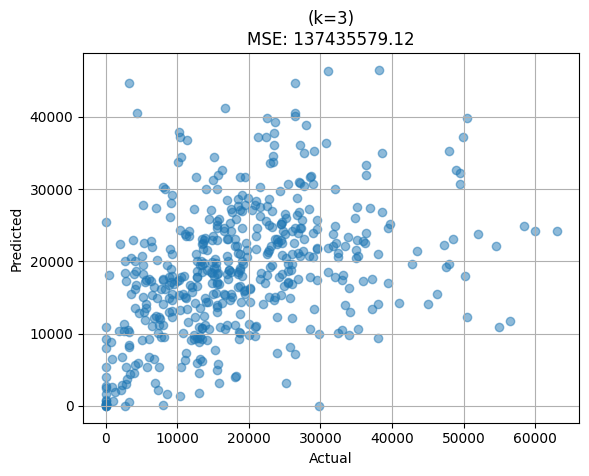

k = 10: MSE = 111767761.20


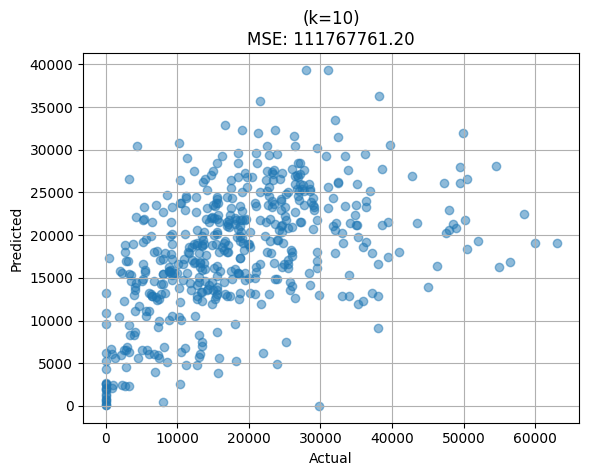

k = 25: MSE = 103793613.08


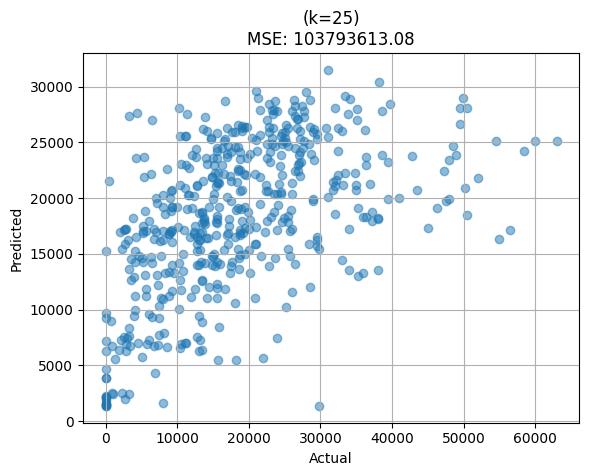

k = 50: MSE = 101970314.93


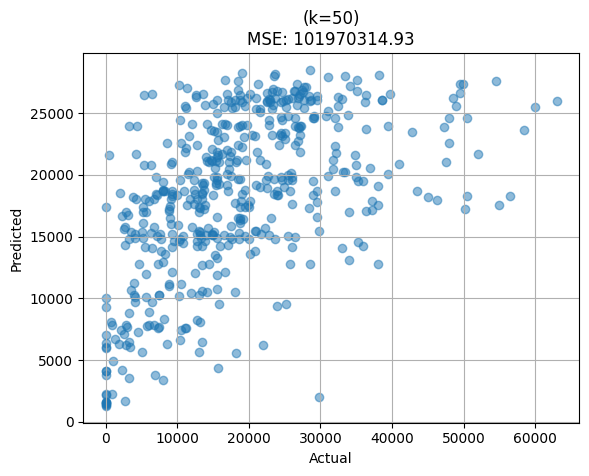

k = 100: MSE = 101817549.55


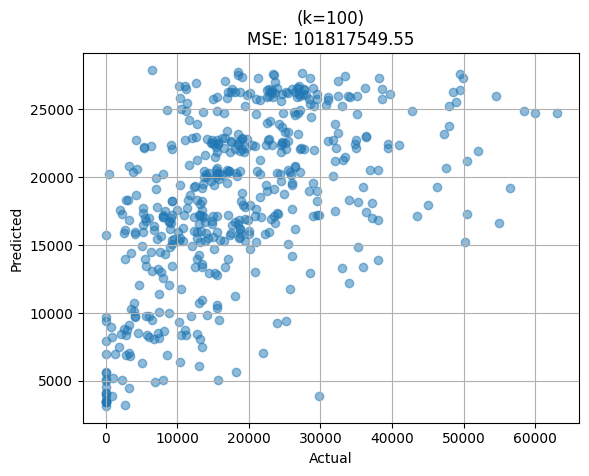

k = 300: MSE = 104432969.06


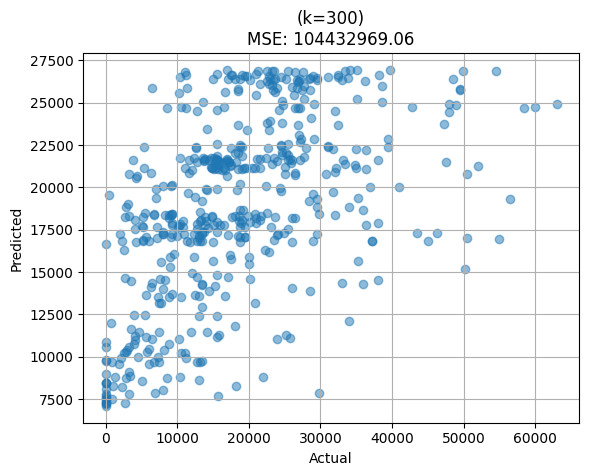

In [51]:
k = [3,10,25,50,100,300]
accuracies = []

for i in k:
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    print(f"k = {i}: MSE = {mse:.2f}")

    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'(k={i})\nMSE: {mse:.2f}')
    plt.grid(True)
    plt.show()


I notice a significant decline in the MSE as we increase k from 0 to 50, however after that point the MSE begins to get larger again, probably due to overfitting.

Optimal k = 50

The graphs where k performs better (lower MSE) are more linear because the actual and predicted values are closer.



**Q2.** This is a case study on $k$ nearest neighbor classification, using the `animals.csv` data.

The data consist of a label, `class`, taking integer values 1 to 7, the name of the species, `animal`, and 16 characteristics of the animal, including `hair`, `feathers`, `milk`, `eggs`, `airborne`, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only `milk`, `aquatic`, and `airborne` to train a new $k$-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use `model.predict_proba(X_test.values)` to predict probabilities rather than labels for your `X_test` test data for your fitted `model`. Are all of the classes represented? Explain your results.

**Q3.** This question is a case study for $k$ nearest neighbor regression, using the `cars_env.csv` data.

The variables that go into the model are one more dimension to think about: We can use the train-test split approach to pick the variables that go into the model, not just the number of neighbors.

1. Load the data. We're going to use `footprint`, `baseline mpg`, `baseline price`, and `baseline sales`. Prepare some EDA results for these variables: describe tables, histograms/kernel density plots, scatterplots, etc. I renamed these variables to `footprint`, `mpg`, `price`, and `sales` to save time.
2. Maxmin normalize `footprint`, `mpg`, and `price`. These will be our features/covariates $X$. Our target/dependent/outcome variable $y$ will be sales. Does it make sense to normalize $y$?
3. Make a 30% train-test split of the data into 30% test/validation data and 70% training data.
4. Using all three covariates --- `footprint`, `mpg`, and `price` --- what's the best $k$ to use? What SSE is achieved on the test set? To answer these questions, evalute the sum of squared error on the test set for a reasonable range of values of $k$ (perhaps 2 to 150), and find the $k$ with the lowest SSE.
5. Do part 4 again, for each pair of variables: `footprint` and `mpg`, `footprint` and `price`, `mpg` and `price`.
6. Which set of variables from parts 4 and 5 does the best, in terms of minimizing SSE at the optimal choice of neighbors? Explain.

**Q4.** This is a case study on $k$ nearest neighbor classification, using the `land_mines.csv` data.

The data consists of a label, `mine_type`, taking integer values 1 to 5, and three properties of the mine, `voltage`, `height` and `soil`. We want to predict the kind of mine from data about it. Imagine working for the DOD or a humanitarian aid agency, trying to help people remove land mines more safely.

1. Load the data. Perform some EDA, summarizing the target label and the features.
2. Split the sample 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Build a $k$-NN classifier. Explain how you select $k$.
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate is it? Where is performance more or less accurate?
5. Notice that you can have a lot of accurate predictions for a given type of mine, but still make a lot of mistakes. Please explain how you'd advise someone to actually use this predictive model in practice, given the errors that it tends to make.

**Q5.** This question is a case study for $k$ nearest neighbor regression, using the `heart_failure_clinical_records_dataset.csv` data.

The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.

**Q6.** This is a case study on $k$ nearest neighbor regression and imputation, using the `airbnb_hw.csv` data.

There are 30,478 observations, but only 22,155 ratings. We're going to build a kNN regressor to impute missing values. This is a common task, and illustrates one way you can use kNN in the future even when you have more advanced models available.

1. Load the `airbnb_hw.csv` data with Pandas. We're only going to use `Review Scores Rating`, `Price`, and `Beds`, so use `.loc` to reduce the dataframe to those variables.
2. Set use `.isnull()` to select the subset of the dataframe with missing review values. Set those aside in a different dataframe. We'll make predictions about them later.
3. Use `df = df.dropna(axis = 0, how = 'any')` to eliminate any observations with missing values/NA's from the dataframe.
4. For the complete cases, create a $k$-NN model that uses the variables `Price` and `Beds` to predict `Review Scores Rating`. How do you choose $k$? (Hint: Train/test split, iterate over reasonable values of $k$ and find a value that minimizes SSE on the test split using predictions from the training set.)
5. Predict the missing ratings.
6. Do a kernel density plot of the training ratings and the predicted missing ratings. Do they look similar or not? Explain why.

In [92]:
data = pd.read_csv('airbnb_hw.csv')
data.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [93]:
data = data.loc[:, ['Review Scores Rating', 'Price', 'Beds']]
data['Price'] = data['Price'].replace({',': ''}, regex=True).astype(float)
data.head()

,Review Scores Rating,Price,Beds
0,NaN,145.0,1.0
1,NaN,37.0,1.0
2,NaN,28.0,1.0
3,NaN,199.0,3.0
4,96.0,549.0,3.0


In [94]:
empty = data[data['Review Scores Rating'].isnull()]

empty.head()

,Review Scores Rating,Price,Beds
0,NaN,145.0,1.0
1,NaN,37.0,1.0
2,NaN,28.0,1.0
3,NaN,199.0,3.0
13,NaN,68.0,1.0


In [95]:
data = data.dropna(axis = 0, how = 'any')

data.head()

,Review Scores Rating,Price,Beds
4,96.0,549.0,3.0
5,100.0,149.0,1.0
6,100.0,250.0,1.0
7,94.0,90.0,1.0
8,90.0,270.0,2.0


In [103]:
X = data[['Price', 'Beds']]
y = data['Review Scores Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

k_values = [50, 100, 120, 150, 200]
mse_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    print(f'k={k}, MSE={mse:.2f}')

k=50, MSE=87.07
k=100, MSE=86.21
k=120, MSE=86.29
k=150, MSE=86.32
k=200, MSE=86.30


In [104]:
use_k = 100
knn_final = KNeighborsRegressor(n_neighbors=use_k)
knn_final.fit(X_train, y_train)


empty_clean = empty.dropna(subset=['Price', 'Beds'])

predicted_ratings = knn_final.predict(empty_clean[['Price', 'Beds']])
empty_clean['Review Scores Rating'] = predicted_ratings

<ipython-input-104-9aa7e6caa186>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empty_clean['Review Scores Rating'] = predicted_ratings


<ipython-input-105-cba35e4a6b3b>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Review Scores Rating'], label='Actual Ratings', shade=True)
<ipython-input-105-cba35e4a6b3b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(predicted_ratings, label='Predicted Ratings', shade=True)


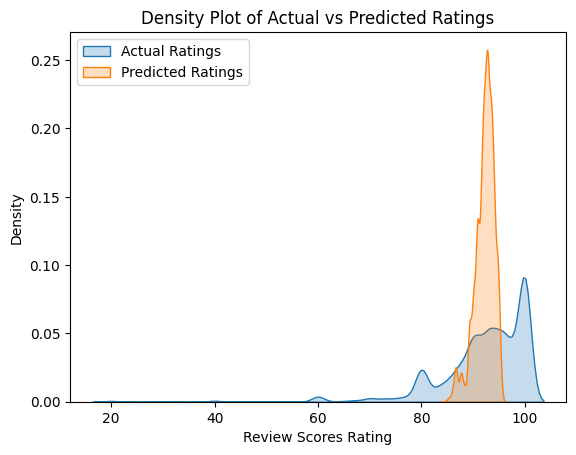

In [105]:
sns.kdeplot(data['Review Scores Rating'], label='Actual Ratings', shade=True)
sns.kdeplot(predicted_ratings, label='Predicted Ratings', shade=True)
plt.xlabel('Review Scores Rating')
plt.ylabel('Density')
plt.title('Density Plot of Actual vs Predicted Ratings')
plt.legend()
plt.show()

The graphs do not look similar but that is because there is a higher density of predicted scores in the 85-95 range, which could make sense because that is probably where people don't always bother to leave a review.  
